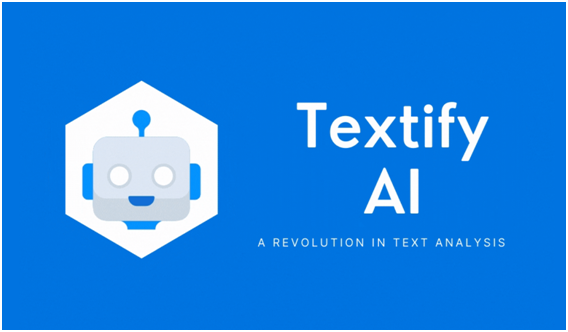

In [1]:
#TEXTIFY AI NLP ENGINEER_TECHNICAL SELECTION ROUND

#HELLO EVERYONE

#Thank you for taking your time to work on these problem sets.

#The aim of this problem set is to evaluate your skills in the following domains:
#     -Python programming basics (list comprehension, iterations, looping, if-else statements, etc )
#     -Web scrapping libraries (BeautifulSoup, requests)
#     -Data structures library (Pandas)
#     -NLP libraries (SpaCy, NLTK)
#     -ML/DL library (scikit-learn or TensorFlow)
#     -Word embedding models (word2vec or GloVe)

#Please follow step-by-step process as mentioned below, and submit your solutions before 20th July.

#Problem set difficulty -> Intermediate     ; Time Requirement-> 4 to 6 hours (experienced developer), 2 to 3 days (Learners)

#In case of any difficulty in accessing the required files, please contact the team at textifyai@gmail.com

#Applicant's name -> ________Aravind K______________________
#Email : aravindkamarsu32@gmail.com

**STEP 1**- Getting Started

In [3]:
#-Download the dataset (Essay_samples.csv) from your email.
#-Copy this notebook into your own google Colab account.
#-Upload the dataset on the notebook as below

from google.colab import files
import io
import pandas as pd
df = pd.read_csv("/content/Essay_samples - Sheet1.csv")

In [4]:
df

,Essay Text
0,"THE ALARM CLOCK IS, TO MANY high school studen..."
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ..."
3,"THIS SUMMER, I WENT TO THE governor’s Honors P..."
4,THIS PAST SUMMER I HAD THE opportunity to part...
...,...
94,CRIME SCENE REPORT\nCrime: Missing Person\nLoc...
95,"AFTER SPENDING A WEEK WITH JOHN NASH, I may ha..."
96,I GREW UP IN A FOUR-ROOM apartment in the midd...
97,"AS I SAT AT A TABLE in the corner of a cafe, h..."


**STEP 2** - Web Scrapping

In [5]:
#-Use BeautifulSoup library to scrape 50 articles from (www.bbc.com).
#-We will then use the scrapped articles to create a hybrid database.

! pip install beautifulsoup4
! pip install requests

import requests
from bs4 import BeautifulSoup as bs

# url = 'https://www.bbc.com/'
# response = requests.get(url)
# data = response.text
# soup = BeautifulSoup(data, 'html.parser')

#Your web-scraping code goes here
def extract_links_from_articles():
    bccTechNews = requests.get('https://www.bbc.com/news/technology')
    TechSoup = bs(bccTechNews.content, 'html.parser')
    links = []
    for a in TechSoup.find_all('a', href=True):
      if '/news/technology-' in a['href'] and '#comp-comments-button' not in a['href']: 
        link = 'https://www.bbc.com' + a['href']
        links.append(link)
    #
    bccAsiaNews = requests.get('https://www.bbc.com/news/world/asia')
    asiaSoup = bs(bccAsiaNews.content, 'html.parser')
    for a in asiaSoup.find_all('a', href=True):
      if 'news/world-asia-' in a['href']: 
        link = 'https://www.bbc.com' + a['href']
        links.append(link)

    bccUkNews = requests.get('https://www.bbc.com/news/uk')
    ukSoup = bs(bccUkNews.content, 'html.parser')
    for a in ukSoup.find_all('a', href=True):
         
      if 'https://www.bbc.com' in a['href']:
        link = a['href']
        links.append(link)
      if 'news/uk-' in a['href']  and 'https://www.bbc' not in a['href']: 
        link = 'https://www.bbc.com' + a['href']
        links.append(link)  
    return links

def scrape_single_article(url:str):
    bccNews = requests.get(url)
    soup = bs(bccNews.content, 'html.parser')
    bbcDf = pd.DataFrame(columns=['Essay Text'])
    articles = soup.find_all('div', class_='ssrcss-18snukc-RichTextContainer e5tfeyi1')
    text = ''
    for article in articles:
        try:
            paragraph = article.find('p').getText()
            text = text + paragraph
        except:    
            pass
    return text 

def scrape_multiple_articles():
    links = extract_links_from_articles()
    links = set(links) 
    bbcDf = pd.DataFrame(columns=['Essay Text'])
    for i in links:
      articleContent = scrape_single_article(i)
      if len(articleContent.split(" ")) >= 40:
        bbcDf = bbcDf.append({'Essay Text': articleContent}, ignore_index=True)
    return bbcDf    

df1 = scrape_multiple_articles()

#
#

#-Create a new pandas table and add the essay database and the scrapped articles.
#df_new = df_essay + df_scraped_articles

df = pd.concat([df, df1], axis=0,join='outer',ignore_index=True)

In [6]:
df

,Essay Text
0,"THE ALARM CLOCK IS, TO MANY high school studen..."
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ..."
3,"THIS SUMMER, I WENT TO THE governor’s Honors P..."
4,THIS PAST SUMMER I HAD THE opportunity to part...
...,...
143,"Police have said they ""ran out"" of fixed penal..."
144,Some children and young people aged over 12 in...
145,More than 50 beachgoers had to be rescued when...
146,Both the UK government and the EU must re-nego...


**STEP 3** - Spacy dependency parsing

In [7]:
#import Spacy library

import spacy
from __future__ import unicode_literals, print_function
from spacy.lang.en import English # updated
nlp = spacy.load('en')

#In case you are unfamiliar with dependency parsing, review the document attached with the mail.

#Use .split("\n") to split the essays into paragraphs.
#Use SpaCy to split the paragraphs into sentences.
#Use SpaCy dependency parsing feature to extract phrases from the sentences 

##HINT-> USE THE SUBTREE argument of TOKEN TO EXTRACT THE COMPLETE PHRASE 
#EXAMPLE:
#if token == 'nsubj':
#  subtree=token.subtree
#  break
#print([(t.text) for t in subtree])


#-Create a sequential list of phrases as they appear in the text.

def phrase_converter(sentence):
  piano_doc = nlp(sentence)
  listo = []

  for token in piano_doc:
      verbFlag = 0
      subjFlag = 0
      if token.dep_ not in ['ROOT','xcomp','ccomp','advcl','nsubjpass','acl','conj','nsubj','cconj']: #if the following elements are present in the words then it's not considered to be a phrase
        subtree=token.subtree
        subtreeList = [(t.text) for t in subtree]
        subtreeWords = " ".join(str(x) for x in subtreeList)
        phraseCheck = nlp(subtreeWords)
        for token in phraseCheck:
          if token.dep_ ==  'nsubj':
            subjFlag == 1
          if token.pos_ == 'VERB':
            verbFlag == 1
        if verbFlag == 1 or subjFlag == 1:
          #print("passed sentence", subtreeList)
          pass   
        elif len(subtreeList)>4:
          #print("passed sentence", subtreeList)
          pass
        else:
          listo.append(" ".join(subtreeList))
        #print(token, token.dep_ ,subtreeList)
      else:
        listo.append(str(token))
        #print(token)
  right = len(listo)-1
  left = right-1
  while left<=right and left>-1:
    if listo[left] in listo[right]:
      if len(listo[left]) < len(listo[right]):
        listo[left] = ""
    else:
      right=left
    left = left-1


  right = left+1
  left = 0
  while left<=right and right<len(listo):
    if listo[right] in listo[left]:
      if len(listo[right]) < len(listo[left]):
        listo[right] = ""
    else:
      left=right
    right = right+1
  listo = [ele for ele in listo if ele != ''] 
  return listo


nlp1 = English()
nlp1.add_pipe(nlp1.create_pipe('sentencizer')) # updated
essay_text = df['Essay Text'].tolist()
sentences = [sent.string.strip() for sent in (nlp1(essay_text[0].split("\n")[0])).sents]
main_list = []
main_list=phrase_converter(sentences[0])
for i in range(len(essay_text)):
  x = essay_text[i].split("\n")
  for j in range(len(x)):
    doc = nlp1(x[j])
    sentences = [sent.string.strip() for sent in doc.sents]
    for k in range(len(sentences)):
      piano_text = str(sentences[k])
      main_list.extend(phrase_converter(piano_text))

**STEP 4** - N-gram next phrase prediction model using either ML/DL

In [ ]:
#Implement N-gram next phrase prediction model.

#Please find more information about the next word prediction model here-> 
#https://medium.com/analytics-vidhya/build-a-simple-predictive-keyboard-using-python-and-keras-b78d3c88cffb
#Also, here ->  https://towardsdatascience.com/next-word-prediction-with-nlp-and-deep-learning-48b9fe0a17bf

#NOTE : Instead of using WORDS, we are using PHRASES (as you might have extracted in the previous step) in this project.

#Play around with the model to improve accuary if possible.

In [9]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
import tensorflow as tf
import pickle
import numpy as np
import os
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq
words = main_list
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))
# unique_word_index['satare'] = len(unique_words)+1
# list(unique_word_index)[-1]

In [10]:
WORD_LENGTH = 5
prev_words = []
next_words = []

for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])

print(prev_words[0])
print(next_words[0])


['THE', 'ALARM', 'CLOCK', 'IS', ',']
MANY


In [11]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.10, batch_size=128, epochs=30, shuffle=False).history        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
499/499 [==============================] - 32s 24ms/step - loss: 7.2833 - accuracy: 0.1011 - val_loss: 7.0559 - val_accuracy: 0.1225
Epoch 2/30
499/499 [==============================] - 11s 21ms/step - loss: 6.3271 - accuracy: 0.1557 - val_loss: 7.5152 - val_accuracy: 0.1258
Epoch 3/30
499/499 [==============================] - 11s 22ms/step - loss: 5.9616 - accuracy: 0.1788 - val_loss: 8.2518 - val_accuracy: 0.1274
Epoch 4/30
499/499 [==============================] - 11s 21ms/step - loss: 6.0258 - accuracy: 0.1890 - val_loss: 8.3947 - val_accuracy: 0.0978
Epoch 5/30
499/499 [==============================] - 11s 21ms/step - loss: 6.2005 - accuracy: 0.2077 - val_loss: 9.1010 - val_accuracy: 0.0873
Epoch 6/30
499/499 [==============================] - 11s 21ms/step - loss: 6.1543 - accuracy: 0.2277 - val_loss: 8.9206 - val_accuracy: 0.0925
Epoch 7/30
499/499 [==============================] - 11s 21ms/step - loss: 5.9684 - accuracy: 0.2622 - val_loss: 8.8768 - val_accuracy:

In [12]:
model.save('keras_next_phrase_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_phrase_model.h5')
history = pickle.load(open("history.p", "rb"))

In [21]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [23]:
tokenizer = RegexpTokenizer(r'\w+')
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

q =  "he is doing it " 


seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
#print(tokenizer.tokenize(q.lower())[0:5])
print("next possible words: ", predict_completions(seq, 5))  

next possible words:  ['"', 'and', ',', 'the', 'for']


**STEP 5**- Fine tuning word embedding (GloVe or Word2Vec)

In [ ]:
#Fine tune word embedding model using the 'Noun' phrases in the data.
#In this step, we will fine tune the word embedding model (either GloVe or Word2Vec) on the Nouns (use POS tag from spacy) from our hybrid database.
#First, extract the nouns in the database in a sequential manner.
#Second, train the word embedding model on the sequential list.
#NOTE: This step requires extracting words (not phrases, as we did before). Please do this step separately from the above step.
import spacy
import gensim.downloader as api
import gensim
import json
import pandas as pd
import string
import time
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec
nlp = spacy.load("en_core_web_sm")
noun_list = []
for i in range(len(main_list)):
  doc = nlp(main_list[i])
  for chunk in doc.noun_chunks:
    if str(chunk) not in noun_list:
      noun_list.append(str(chunk))
wv = api.load('word2vec-google-news-300')      
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        elif self.epoch % 100 == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss
w2v_model = Word2Vec(size = 300,
                     window = 15,
                     min_count = 2,
                     workers = 20,
                     sg = 1,
                     negative = 5,
                     sample = 1e-5)
w2v_model.build_vocab(myFinallist)
start = time.time()
w2v_model.train(myFinallist, 
                total_examples=w2v_model.corpus_count, 
                epochs=100, 
                report_delay=1,
                compute_loss = True,
                callbacks=[callback()]) 
end = time.time()
print("elapsedtime in seconds :"+ str(end - start))
w2v_model.save('word2vec.model')

**BONUS STEP**
Use the word-embedding model to promote/demote suggestions from the N-gram model.

In [ ]:
#This is a bonus step
#Using the word embedding model, filter out the distant/irrelevant suggestions from the N-gram next phrase prediction model.

#HINT-> extract the noun using the POS tag from each of the next phrase predictions (in the ngram model)
#Then find the distance of the NOUNS from the current NOUN in the word embedding model.
#Rank the nouns in terms of distance from each other.
#Retain only the top 5 results.

